In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/woonghan172/Data-mining-project/refs/heads/main/goemotions_1.csv')
df.head()



,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

Number of duplicate rows: 0


In [3]:
print(f"Duplicate text entries: {df.duplicated(subset=['text']).sum()}")

Duplicate text entries: 26818


In [4]:
print(f"Unclear examples: {df['example_very_unclear'].sum()}")
# Create a clean DataFrame for your main analysis
clean_df = df[df['example_very_unclear'] == False]

Unclear examples: 1129


In [5]:
# Get all column names from 'admiration' to 'neutral'
emotion_cols = list(df.columns[9:])
print(f"There are {len(emotion_cols)} emotion columns.")

There are 28 emotion columns.


neutral           18423
approval           5928
admiration         5647
annoyance          4443
gratitude          3863
disapproval        3774
curiosity          3267
amusement          3081
optimism           2887
realization        2867
disappointment     2771
love               2745
joy                2607
anger              2589
confusion          2471
sadness            2193
caring             1988
excitement         1900
surprise           1806
disgust            1704
desire             1248
fear               1048
remorse             849
embarrassment       817
nervousness         598
relief              452
pride               452
grief               227
dtype: int64


<Axes: title={'center': 'Overall Emotion Frequency'}>

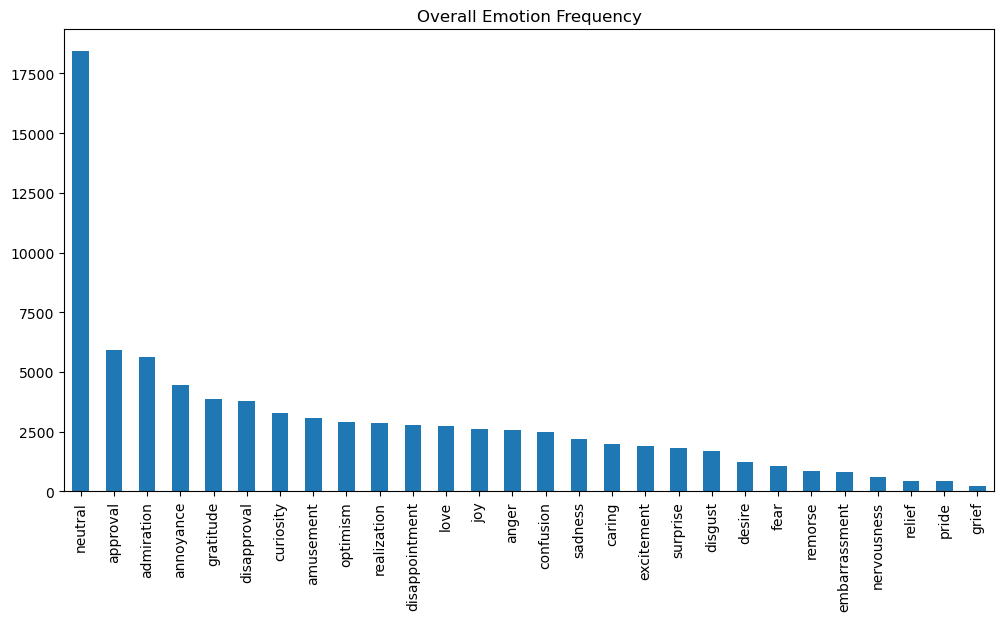

In [6]:
# This sums up the '1's for each emotion
emotion_counts = df[emotion_cols].sum().sort_values(ascending=False)
print(emotion_counts)

# Plot this as a bar chart
emotion_counts.plot(kind='bar', figsize=(12, 6), title='Overall Emotion Frequency')

<Axes: title={'center': 'Number of Emotions per Text'}, xlabel='emotion_count'>

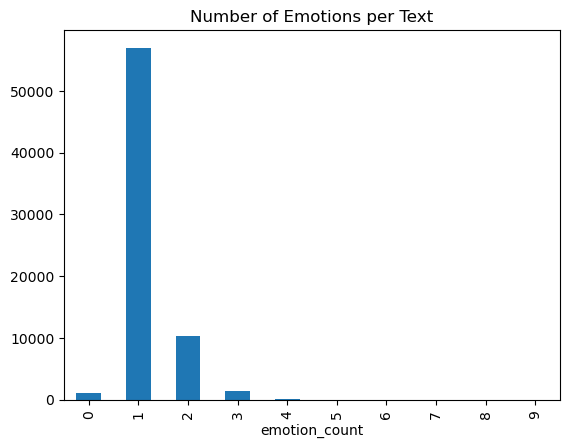

In [7]:
# Sum across the rows to get a count of emotions for each text
df['emotion_count'] = df[emotion_cols].sum(axis=1)

# Plot the distribution
df['emotion_count'].value_counts().sort_index().plot(kind='bar', title='Number of Emotions per Text')

In [8]:
# True if 'neutral' is 1 AND the total emotion count is 1
is_pure_neutral = (df['neutral'] == 1) & (df['emotion_count'] == 1)
print(f"Number of 'purely neutral' texts: {is_pure_neutral.sum()}")

Number of 'purely neutral' texts: 18423


<Axes: title={'center': 'Distribution of Text Length'}, ylabel='Frequency'>

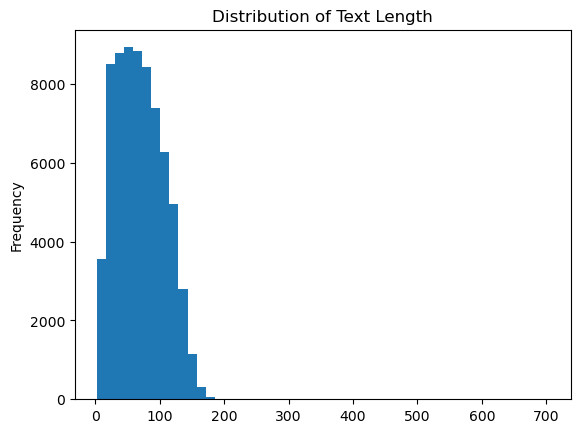

In [9]:
df['text_length'] = df['text'].str.len()

# Plot the distribution of text lengths
df['text_length'].plot(kind='hist', bins=50, title='Distribution of Text Length')

In [12]:
!conda install -c conda-forge wordcloud -y

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




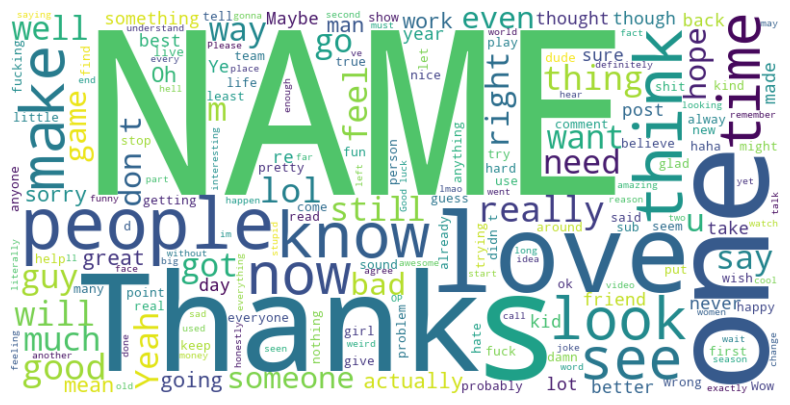

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all text into one giant string
all_text = " ".join(df['text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

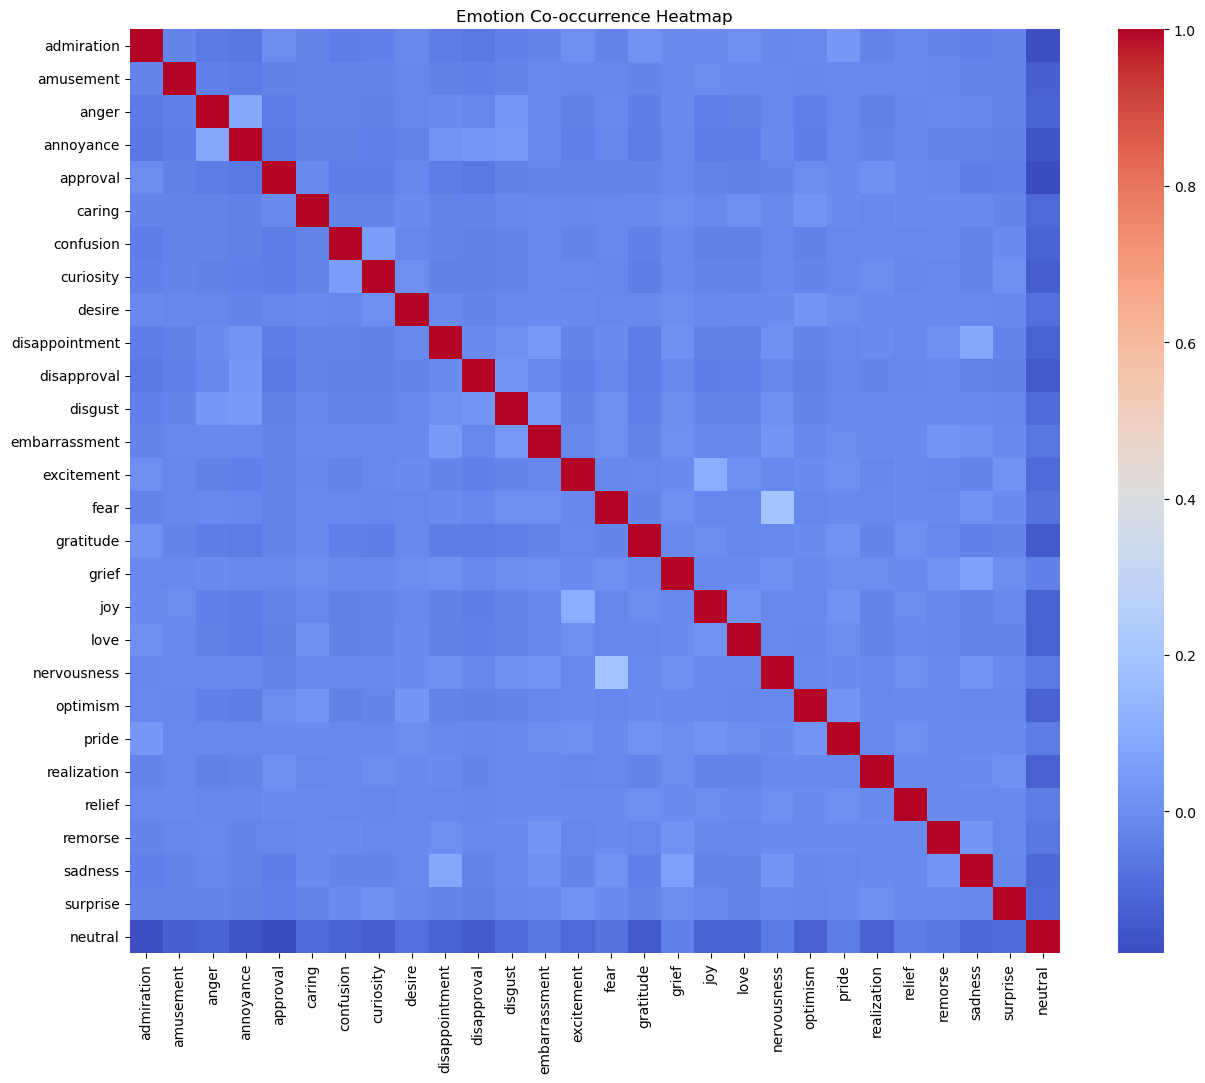

In [14]:
import seaborn as sns

# Calculate the correlation matrix for the emotion columns
emotion_corr = df[emotion_cols].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(emotion_corr, annot=False, cmap='coolwarm')
plt.title('Emotion Co-occurrence Heatmap')
plt.show()

<Axes: title={'center': 'Average Text Length by Emotion'}>

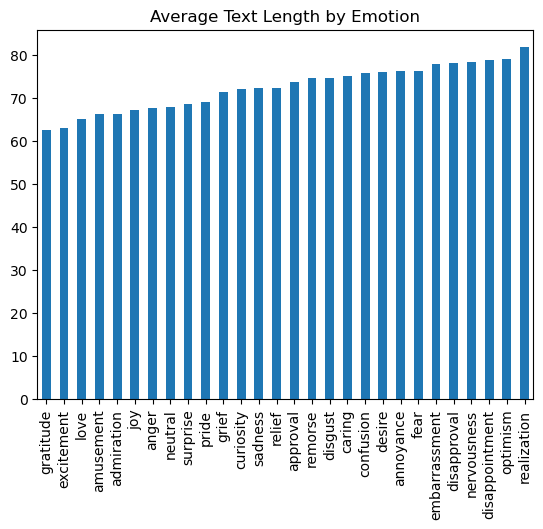

In [15]:
# Calculate average text length for each emotion
# This is a bit advanced, but a great analysis:

avg_length_by_emotion = {}
for col in emotion_cols:
    avg_length_by_emotion[col] = df[df[col] == 1]['text_length'].mean()

# Convert to a Series and plot
pd.Series(avg_length_by_emotion).sort_values().plot(kind='bar', title='Average Text Length by Emotion')

<Axes: title={'center': 'Emotions in Top 10 Subreddits'}, xlabel='subreddit'>

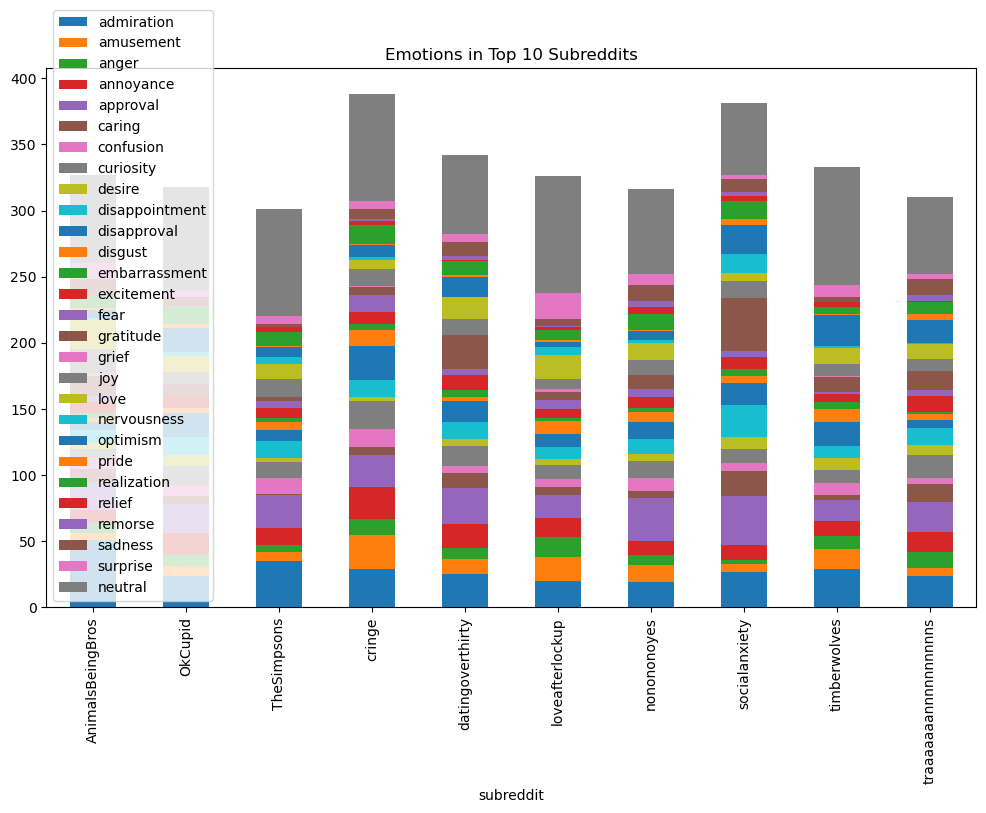

In [16]:
# Find top 10 subreddits
top_subreddits = df['subreddit'].value_counts().head(10).index

# Group by subreddit and sum the emotions
subreddit_emotions = df[df['subreddit'].isin(top_subreddits)].groupby('subreddit')[emotion_cols].sum()

# Plot as a stacked bar chart
subreddit_emotions.plot(kind='bar', stacked=True, figsize=(12, 7), title='Emotions in Top 10 Subreddits')

In [17]:
import os
print(os.getcwd())


C:\Users\Raghuram Gowrav
